In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")


df=pd.read_csv("C:/Users/User/OneDrive/Desktop/CSV_files/zomato.csv",encoding="latin-1")
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [2]:
df.shape

(9551, 21)

In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [7]:
df[(df.Votes>200)&(df.Votes<300)][['City']]

,City
2,Mandaluyong City
4,Mandaluyong City
12,Quezon City
14,San Juan City
17,Tagaytay City
...,...
9513,Colombo
9514,Colombo
9519,Ankara
9522,Ankara


In [8]:
df[df['Rating text']=='Excellent'][['City']]

,City
0,Makati City
1,Makati City
3,Mandaluyong City
4,Mandaluyong City
8,Pasay City
...,...
9537,ÛÁstanbul
9538,ÛÁstanbul
9540,ÛÁstanbul
9543,ÛÁstanbul


In [9]:
df.sort_values(by=['Aggregate rating'])

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
6615,18446486,LSK Express,1,New Delhi,"4a/57, Old Rajinder Nagar, New Delhi",Rajinder Nagar,"Rajinder Nagar, New Delhi",77.186603,28.640834,"North Indian, Italian, Continental",...,Indian Rupees(Rs.),No,Yes,No,No,2,0.0,White,Not rated,1
1994,18393709,Apni Rasoi,1,Gurgaon,"HUDA Market Parking, Sector 56, Gurgaon",Sector 56,"Sector 56, Gurgaon",77.099865,28.425257,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
1995,18421493,Bala Ji Sweets Corner,1,Gurgaon,"HUDA Market, Sector 56, Gurgaon",Sector 56,"Sector 56, Gurgaon",77.099298,28.425037,"Mithai, Street Food",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
1996,18464628,Barista,1,Gurgaon,"52, Paras Trade Center, Sector 56, Gurgaon",Sector 56,"Sector 56, Gurgaon",77.134045,28.436750,Cafe,...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,0
1997,18398590,Biryani Express,1,Gurgaon,"Shop 3, Mehar Chand Complex, Wazirabad Market,...",Sector 56,"Sector 56, Gurgaon",77.089317,28.431613,Biryani,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,5800176,Ministry of Crab,191,Colombo,"Old Colombo Dutch Hospital, Fort, Colombo 01","Old Dutch Hospital, Fort","Old Dutch Hospital, Fort, Colombo",79.844239,6.932814,Seafood,...,Sri Lankan Rupee(LKR),No,No,No,No,4,4.9,Dark Green,Excellent,203
39,6600427,Coco Bambu,30,Brasí_lia,"SCES, Trecho 2, Conjunto 13/36, Setor de Clube...",Setor De Clubes Esportivos Sul,"Setor De Clubes Esportivos Sul, Brasí_lia",-47.868500,-15.819000,International,...,Brazilian Real(R$),No,No,No,No,4,4.9,Dark Green,Excellent,30
324,17500759,Ingleside Village Pizza,216,Macon,"2395 Ingleside Ave, Macon, GA 31204",Macon,"Macon, Macon",-83.657061,32.853896,"Pizza, Sandwich",...,Dollar($),No,No,No,No,1,4.9,Dark Green,Excellent,478
580,5703500,Punjab Grill,214,Abu Dhabi,"Venetian Village, Ritz Carlton Abu Dhabi, Gran...","Venetian Village, Al Maqtaa","Venetian Village, Al Maqtaa, Abu Dhabi",54.487214,24.410615,"Indian, North Indian",...,Emirati Diram(AED),Yes,No,No,No,4,4.9,Dark Green,Excellent,216


In [10]:
df.sort_values(by=['City','Aggregate rating'])

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
573,5700386,Sangeetha Vegetarian Restaurant,214,Abu Dhabi,"Opposite Cristal Hotel, Behind KM Trading, Ele...",Madinat Zayed,"Madinat Zayed, Abu Dhabi",54.363776,24.485253,"Indian, South Indian",...,Emirati Diram(AED),No,Yes,No,No,2,3.6,Yellow,Good,268
572,5702418,Gazebo,214,Abu Dhabi,"Ground Level, Next to E-Max, Dalma Mall, Mussa...","Dalma Mall, Mussafah Sanaiya","Dalma Mall, Mussafah Sanaiya, Abu Dhabi",54.524122,24.334217,"Indian, North Indian, Mughlai, Biryani",...,Emirati Diram(AED),Yes,Yes,No,No,3,4.0,Green,Very Good,355
575,5701052,Applebee's,214,Abu Dhabi,"Level 3, Mushrif Mall, Al Mushrif, Abu Dhabi","Mushrif Mall, Al Mushrif","Mushrif Mall, Al Mushrif, Abu Dhabi",54.413141,24.434099,"American, Mexican, Seafood",...,Emirati Diram(AED),No,Yes,No,No,4,4.0,Green,Very Good,205
576,5704118,Tikka Tonight,214,Abu Dhabi,"Behind RAK Bank, Sanaiya ME11, Mussafah Sanaiy...",Mussafah Sanaiya,"Mussafah Sanaiya, Abu Dhabi",54.510040,24.363130,"Pakistani, Afghani, Indian, Hyderabadi",...,Emirati Diram(AED),No,Yes,No,No,2,4.0,Green,Very Good,277
577,5701548,Bait El Khetyar,214,Abu Dhabi,"Al Najda Street, Najda, Abu Dhabi",Najda,"Najda, Abu Dhabi",54.371434,24.488411,"Lebanese, Arabian, Middle Eastern",...,Emirati Diram(AED),No,Yes,No,No,2,4.0,Green,Very Good,380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9543,5916085,Dem Karakí_y,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, Hoca Ta...",Karakí_y,"Karakí_y, ÛÁstanbul",28.978237,41.024633,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.5,Dark Green,Excellent,761
9537,5904116,J'adore Chocolatier,208,ÛÁstanbul,"AsmalÛ±mescit Mahallesi, ÛÁstiklal Caddesi, Em...",AsmalÛ±mescit,"AsmalÛ±mescit, ÛÁstanbul",28.976127,41.033002,Desserts,...,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1311
9544,5915547,Karakí_y Gí_llí_oÛôlu,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977636,41.022904,"Desserts, Bí_rek",...,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1305
9538,5901782,Starbucks,208,ÛÁstanbul,"Bebek Mahallesi, Cevdetpaôa Caddesi, No 30/A,...",Bebek,"Bebek, ÛÁstanbul",29.043734,41.077696,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.9,Dark Green,Excellent,1042


In [11]:
#Group Level Aggregates
#Find out city wise average Price range

df.groupby(by=["City"])['Price range'].mean()

City
Abu Dhabi          3.300000
Agra               2.650000
Ahmedabad          2.571429
Albany             1.700000
Allahabad          2.650000
                     ...   
Weirton            2.000000
Wellington City    3.250000
Winchester Bay     2.000000
Yorkton            2.000000
ÛÁstanbul          2.857143
Name: Price range, Length: 141, dtype: float64

In [12]:
df.groupby(by=["City"])['Price range'].count()

City
Abu Dhabi          20
Agra               20
Ahmedabad          21
Albany             20
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
ÛÁstanbul          14
Name: Price range, Length: 141, dtype: int64

In [13]:
df.groupby(by=["City"])['Price range'].max()

City
Abu Dhabi          4
Agra               4
Ahmedabad          4
Albany             4
Allahabad          4
                  ..
Weirton            2
Wellington City    4
Winchester Bay     2
Yorkton            2
ÛÁstanbul          4
Name: Price range, Length: 141, dtype: int64

In [14]:
df.groupby(by=["City"])['Price range'].min()

City
Abu Dhabi          2
Agra               1
Ahmedabad          1
Albany             1
Allahabad          1
                  ..
Weirton            2
Wellington City    1
Winchester Bay     2
Yorkton            2
ÛÁstanbul          2
Name: Price range, Length: 141, dtype: int64

In [15]:
#find total number of missing values

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [16]:
df.corr()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


In [17]:
df_country=pd.read_excel("C:/Users/User/OneDrive/Desktop/CSV_files/Country-Code.xlsx")
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [18]:
df_final=pd.merge(df,df_country,on='Country Code',how='left')
df_final.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [19]:
df_final.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [20]:
df_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [21]:
df_final.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [22]:
country_name =df_final.Country.value_counts().index

In [23]:
country_val =df_final.Country.value_counts().values

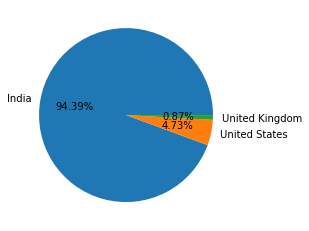

In [24]:
## Pie Chart- top 3 countries that uses Zomato

plt.pie(country_val[:3],labels=country_name[:3],autopct='%1.2f%%')
plt.show()

Oservation : 1.Zomato Maximum records or transaction are from India After that UAS and then United Kingdom.

In [25]:
df_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [26]:
ratings = df_final.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Observation
1.When Rating is between 4.5 to 4.9 = Excellent

2.When Rating is between 4.0 to 4.4 = Very Good

3.When Rating is between 3.5 to 3.9 = Good

4.When Rating is between 2.5 to 3.4 = Average

5.When Rating is between 1.8 to 2.4 = Poor

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

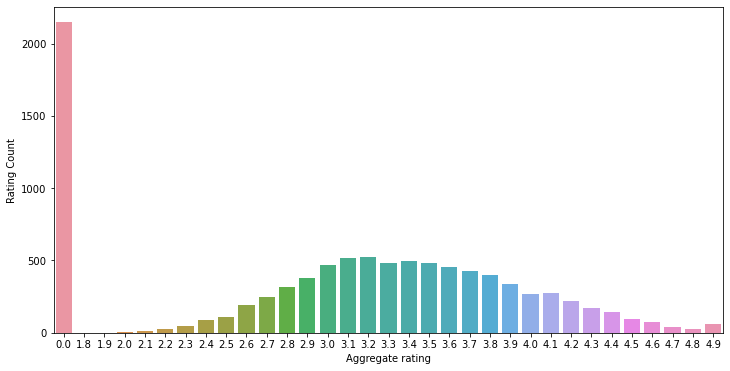

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

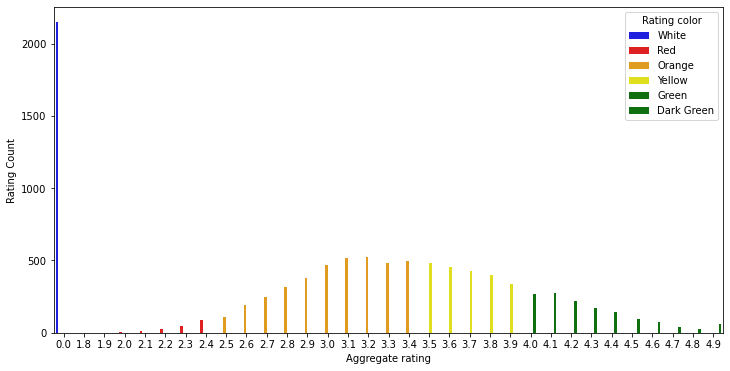

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

Observation :

1.not rated count is very high     
2.Maximum number rating are between 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

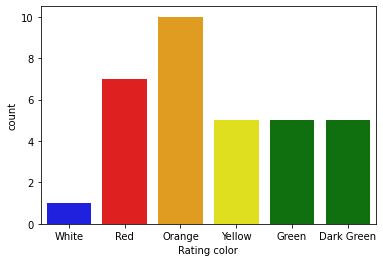

In [29]:
# count plot 
sns.countplot(x='Rating color', data=ratings, palette=['blue','red','orange','yellow','green','green'])

In [30]:
# find the country name thas given 0 rating.

df_final[df_final['Aggregate rating']==0].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [31]:
# find the country name thas given 0 rating.

df_final.groupby(['Aggregate rating','Country']).size().reset_index()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1
...,...,...,...
217,4.9,Sri Lanka,1
218,4.9,Turkey,3
219,4.9,UAE,4
220,4.9,United Kingdom,4


Observation:

1.Maximum number of zero rating are from Indian Customers.

In [32]:
# Find out which currency is used by which country?
df_final[['Country','Currency']].groupby(['Country', 'Currency']).size().reset_index()


,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [33]:
# Which country do have online deliveries option
df_final[df_final['Has Online delivery']=="Yes"].groupby(['Country', 'Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,India,Yes,2423
1,UAE,Yes,28


In [34]:
df_final[df_final['Has Online delivery']=="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

Observation:

1.Online delivery are available in India and UAE

In [35]:
#create a pie chart top 5 cities distribution 

df_final.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Cochrane', 'Huskisson', 'Vineland Station', 'Inverloch', 'Beechworth',
       'Bandung', 'Ojo Caliente', 'Tagaytay City', 'Winchester Bay',
       'Chatham-Kent'],
      dtype='object', length=141)

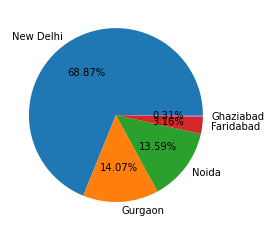

In [36]:
city_val = df_final.City.value_counts().values
city_index =df_final.City.value_counts().index
plt.pie(city_val[:5],labels=city_index[:5], autopct='%1.2f%%')
plt.show()

In [37]:
#top 5 Cuisines

df_final.Cuisines.value_counts().index

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food',
       ...
       'North Indian, Cafe', 'American, Fast Food, Desserts',
       'Mediterranean, Italian, Thai, European',
       'Cafe, Mexican, Italian, North Indian, Chinese',
       'Continental, Chinese, Biryani, North Indian',
       'Fast Food, Healthy Food', 'Seafood, Steak',
       'Cafe, Bakery, Tea, Vegetarian',
       'Mediterranean, Continental, North Indian, Italian',
       'Brazilian, Seafood'],
      dtype='object', length=1825)

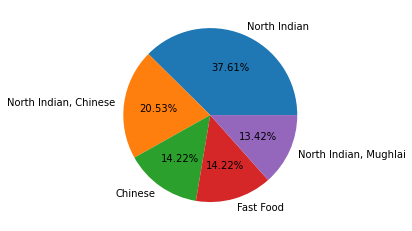

In [38]:
cuisines_val = df_final.Cuisines.value_counts().values
cuisines_index =df_final.Cuisines.value_counts().index
plt.pie(cuisines_val[:5],labels=cuisines_index[:5], autopct='%1.2f%%')
plt.show()